## Data Gathering

In [1]:
!wget "https://www.dropbox.com/s/ykjdfve0ogfzui2/titanic.csv"

--2021-06-20 13:55:57--  https://www.dropbox.com/s/ykjdfve0ogfzui2/titanic.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ykjdfve0ogfzui2/titanic.csv [following]
--2021-06-20 13:55:58--  https://www.dropbox.com/s/raw/ykjdfve0ogfzui2/titanic.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c08e7217361beebda41accd09.dl.dropboxusercontent.com/cd/0/inline/BQyvCvbhA0cOM0fDy_rhILz9LiSBnlstvs1Z-s6KBciDoBeklh5i16H-1WzmdhZ7VM1cuKJxud4utcOsEG8BdfWg2vzvO4Vegfi3_qlT5Q7w_5JQHJX9kbcIn2gMozAv6MDLbUqIHyMlfPLsCvCXpKby/file# [following]
--2021-06-20 13:55:58--  https://uc3c08e7217361beebda41accd09.dl.dropboxusercontent.com/cd/0/inline/BQyvCvbhA0cOM0fDy_rhILz9LiSBnlstvs1Z-s6KBciDoBeklh5i16H-1WzmdhZ7VM1cuKJxud4utcOsEG8BdfWg2vzvO

Now, You have the .csv file.

### Importing Python Libraries for Data Science

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading data**

In [3]:
titanic = pd.read_csv("titanic.csv")

Dataset is now loaded in a variable called titanic

**Q - How many rows and columns are there?**

In [4]:
titanic.shape

(891, 12)

**Q - Can you tell me the column names?**

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Q - Display some data.**

In [8]:
# head() will display you the first 5 rows of the data.

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Q - Some information**

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Something's wrong with Age, Cabin, Embarked columns.

These columns have some Missing Data.

**Handling Missing Data** is an important concept in data science.


**Q - Tell me some satistic properties about data.**

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What do you observe from this ?

**Q - Which entry from data is missing.**

In [12]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Really bad way of looking at data.

Can we do something better?

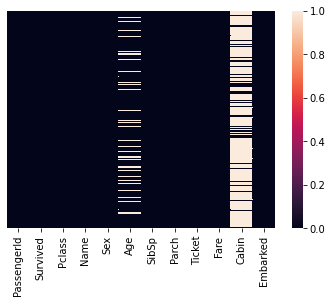

In [13]:
sns.heatmap(titanic.isnull(), yticklabels=False)

Here comes our first visualization.
This graph is called **heatmap**. The color shows the intensity of the number.

False = 0

True = 1

### Let's do more Data Visualisation 

**Q - How many people survived/died in titanic?**

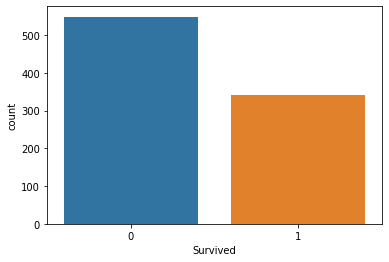

In [14]:
sns.countplot(x="Survived",data=titanic)

This is just like a **bar graph**. Counting the number of elements for survived 1 and 0

**Q - Can you tell is there any relation of people dying with their gender?**

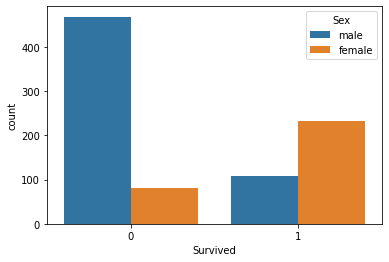

In [15]:
sns.countplot(x="Survived", data=titanic, hue="Sex")

**Observation :**

Those who died mostly they are men.

While, those who survived mostly they were female.


**Q - is there any relation of people dying with their Pclass?**

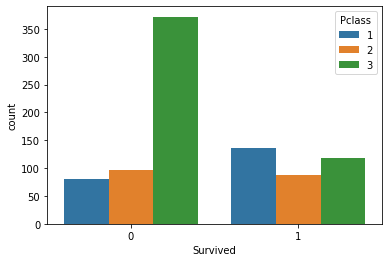

In [16]:
sns.countplot(x="Survived", data=titanic, hue="Pclass")

**Observation :**

Those who died Mostly they were from 3rd class.

But what about those who survived? 
Why the graph is equal for them?

according to my opinion sex matters here, women irrespective of classes survived!!

**Q - Plot the histogram of Age column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


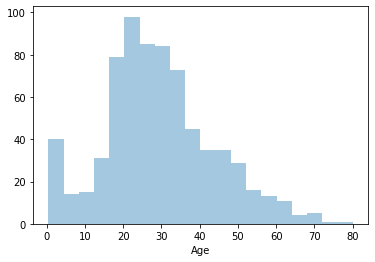

In [20]:
sns.distplot(titanic['Age'] ,kde=False)

**Observation :**
The age data is normally distributed.

Approx Average age : 27

**Q - How many people don't have their siblings along with them.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


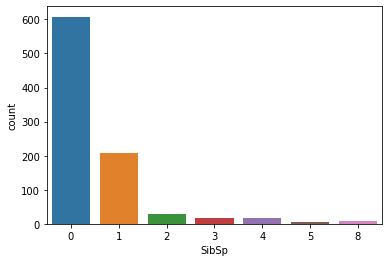

In [18]:
sns.countplot(titanic["SibSp"])

**Observation :**

There were almost 600 passangers who were travelling alone.

**Q - How Fare column is distributed.?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


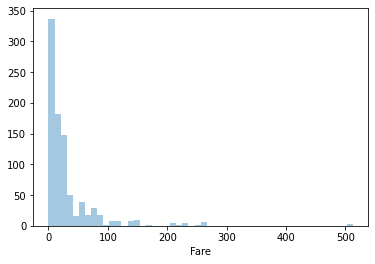

In [22]:
sns.distplot(titanic['Fare'],kde=False)

**Observation :**

Most of the passangers bought ticket at a low price.

represented from exponential graph

### Box Plot

**Q - What is the average age of passangers Pclass wise.?**

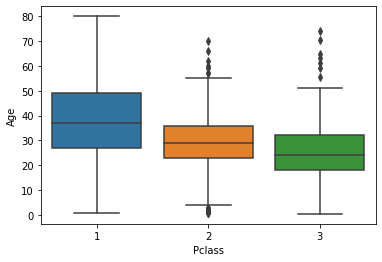

In [23]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

**Observation :**

Pclass1 = 38

Pclass2 = 29

Pclass3 = 25

# Handling Missing Values
- Deleting the column
- Deleting the entry/row
- Fill the missing cell
    - Mean (Numerical values)
    - Mode (Categorial values)


In [24]:
titanic['Age'].fillna(29, inplace = True)

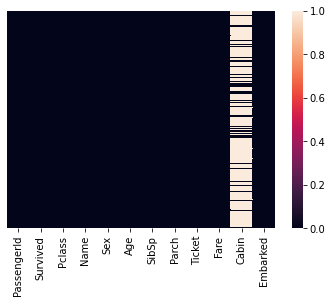

In [25]:
# No NAN values in Age

sns.heatmap(titanic.isnull(), yticklabels=False)

**Let's delete the Cabin Column**

In [26]:
titanic.drop('Cabin', axis=1, inplace=True)

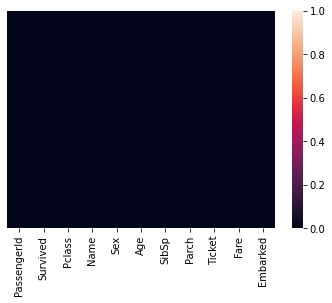

In [27]:
# No NAN values at ALL

sns.heatmap(titanic.isnull(), yticklabels=False)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


There are still 2 rows having missing values in Embarked columne.

Let's delete those rows

In [30]:
titanic.dropna(inplace=True)

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


**Q - Select only the revelant columns.**

In [33]:
columns = ['Survived', 'Pclass', "Sex", 'Age', 'SibSp', 'Parch', 'Fare']

titanic = titanic[columns]

In [34]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


**Q - Changing categorical variable to numerical variable**

In [35]:
titanic['Sex'] = titanic['Sex'].astype('category').cat.codes

In [36]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


**Observation :**

Male = 1

Female = 0

**Q - Convert Data into input and output variables**

In [37]:
input_variables = ["Pclass",	"Sex",	"Age",	"SibSp",	"Parch",	"Fare"]
output_variable = "Survived"

In [38]:
input_data = titanic[input_variables]
output_data = titanic[output_variable]

In [39]:
input_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [40]:
output_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Machine Learning comes Here.!!!